# 📌 Importação de bibliotecas essenciais

- **pandas (pd):** manipulação e análise de dados tabulares (DataFrames).
- **numpy (np):** suporte a operações numéricas, vetores e arrays.
- **matplotlib.pyplot (plt):** criação de gráficos estáticos.
- **seaborn (sns):** visualizações estatísticas com base no Matplotlib, com gráficos mais sofisticados.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 📊 Descrição do Dataset *vgsales.csv*

Este conjunto de dados contém informações sobre vendas de jogos de videogame em diferentes regiões do mundo. Ele é amplamente utilizado para análises de mercado e estudos sobre a indústria dos games. Cada linha representa um jogo específico com suas respectivas informações.

---

### 🧾 Colunas do DataFrame:

| Coluna        | Descrição                                                      |
|---------------|----------------------------------------------------------------|
| **Rank**      | Posição do jogo no ranking de vendas globais.                  |
| **Name**      | Nome do jogo.                                                  |
| **Platform**  | Plataforma (console) em que o jogo foi lançado (ex: PS2, Wii, X360). |
| **Year**      | Ano de lançamento do jogo.                                     |
| **Genre**     | Gênero do jogo (ex: Sports, Action, Puzzle).                   |
| **Publisher** | Empresa responsável pela publicação do jogo.                   |
| **NA_Sales**  | Vendas na América do Norte (em milhões de unidades).           |
| **EU_Sales**  | Vendas na Europa (em milhões de unidades).                     |
| **JP_Sales**  | Vendas no Japão (em milhões de unidades).                      |
| **Other_Sales** | Vendas em outras regiões (em milhões de unidades).           |
| **Global_Sales** | Vendas globais totais (em milhões de unidades).              |

---

# 🔢 Informações gerais:

- Número total de entradas: **16.598 jogos**.
- Métricas de vendas estão expressas em **milhões de cópias**.
- Os dados abrangem jogos de várias gerações de consoles, desde a década de **1980 até 2016**.

---

# 📈 Aplicações e Perguntas que podem ser respondidas:

- Quais jogos ou gêneros vendem mais?
- Qual publisher é mais dominante?
- Qual plataforma teve maior impacto nas vendas?
- Como as vendas se distribuem entre continentes?


In [52]:
df=pd.read_csv("C:/Users/Pichau/Desktop/VGSALES/vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Estrutura Geral do Dataset

- **Entradas totais:** 16.598 linhas (jogos).
- **Colunas:** 11, com diferentes tipos de dados.

---

### 🔍 Tipos de dados:

| Tipo    | Quantidade de colunas | Exemplos de colunas                    |
|---------|----------------------|--------------------------------------|
| int64   | 1                    | Rank                                 |
| float64 | 6                    | Ano de lançamento, vendas (Global, NA, EU, JP, Other) |
| object  | 4                    | Name, Platform, Genre, Publisher     |


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Verificação de valores nulos no dataset (`df.isnull().sum()`)

### Identificamos a presença de dados faltantes em duas colunas:

- **Year:** 271 valores nulos
- **Publisher:** 58 valores nulos

As demais colunas não apresentam valores ausentes, indicando que a maioria dos registros está completa para análise.

Essa informação orienta o tratamento dos dados faltantes nas próximas etapas do projeto.


In [54]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Identificação dos índices com valores nulos na coluna Year

### Essa linha filtra os registros onde a coluna `Year` está ausente (`NaN`) e armazena os índices dessas linhas na variável `index_ano`.


In [55]:
index_ano=df[df["Year"].isnull()].index
index_ano

Index([  179,   377,   431,   470,   607,   624,   649,   652,   711,   782,
       ...
       16191, 16194, 16198, 16229, 16246, 16307, 16327, 16366, 16427, 16493],
      dtype='int64', length=271)

# Remoção das linhas com ano (Year) ausente

Essa linha remove do DataFrame todas as linhas cujos índices estão em `index_ano`, ou seja, exclui os registros com valor nulo na coluna `Year`.  
Isso garante que análises temporais (por ano ou década) não sejam afetadas por dados incompletos.

```python
df = df[~df.index.isin(index_ano)]
df


In [56]:
df=df[~df.index.isin(index_ano)]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Atualização: Verificação final de valores nulos

Após a remoção dos registros sem ano (`Year`), verificamos novamente a presença de valores nulos no dataset.

### Resumo da situação atual:

- ✅ Todas as colunas, exceto a coluna `Publisher`, estão completas (sem valores nulos).
- ⚠️ A coluna `Publisher` ainda possui 36 valores nulos, que precisam ser tratados.
- 🧼 O próximo passo será o tratamento dos dados faltantes na coluna `Publisher`.

### Verificação dos valores nulos após limpeza:

```python
df.isnull().sum()


In [57]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

# Conversão do tipo de dado da coluna Year

### Objetivo:
Remover registros com o ano (`Year`) ausente e garantir a tipagem correta da coluna para facilitar análises numéricas.

### Etapas realizadas:
- `df = df[~df.index.isin(index_ano)].copy()`: Remove as linhas onde o ano está ausente (usando os índices previamente identificados).
- `df["Year"] = df["Year"].astype("Int64")`: Converte a coluna `Year` para o tipo `Int64` do pandas, que suporta valores nulos, diferente do tipo `int64` puro.

### Resultado:
O DataFrame não possui mais valores nulos na coluna `Year` e a coluna está com o tipo adequado para análises numéricas envolvendo anos.


In [58]:
df = df[~df.index.isin(index_ano)].copy()
df["Year"] = df["Year"].astype("Int64")


# Verificação de Duplicatas

### Resultado:
`0` (ou `np.int64(0)`)

### Interpretação:
O DataFrame não contém linhas duplicadas — ou seja, não há registros idênticos entre si em todas as colunas.  
Isso assegura que cada entrada no conjunto de dados é única, evitando enviesamentos em análises estatísticas ou visuais.


In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

# Tratamento de Valores Ausentes — Coluna Publisher

### O que foi feito:

Os 36 valores ausentes na coluna `Publisher` foram substituídos por `0`.  
Isso garante que a coluna fique livre de valores nulos, facilitando análises posteriores.

### Nota:

Esse valor `0` será posteriormente convertido para uma string mais representativa, como `"Desconhecido"`, garantindo melhor legibilidade dos dados durante visualizações e agrupamentos.

```python
df.loc[:, "Publisher"] = df["Publisher"].fillna(0)


In [61]:
df.loc[:,"Publisher"]=df["Publisher"].fillna(0)


In [62]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Ajuste na Coluna Publisher — Substituição de Valores Ausentes

### Descrição:
Criamos a função `categorizando_publisher` para transformar os valores `0` (que foram usados para preencher valores nulos) em uma string mais informativa `"Desconhecido"`.

### Objetivo:
Garantir que todos os valores da coluna `Publisher` sejam strings legíveis, facilitando a interpretação dos dados e a visualização, especialmente para os valores originalmente ausentes.

```python
def categorizando_publisher(x):
    if x == 0:
        return "Desconhecido"
    else:
        return x

df.loc[:, "Publisher"] = df["Publisher"].apply(categorizando_publisher)


| Rank  | Name              | Platform | Year | Genre    | Publisher | NA\_Sales | EU\_Sales | JP\_Sales | Other\_Sales | Global\_Sales |
| ----- | ----------------- | -------- | ---- | -------- | --------- | --------- | --------- | --------- | ------------ | ------------- |
| 0     | Wii Sports        | Wii      | 2006 | Sports   | Nintendo  | 41.49     | 29.02     | 3.77      | 8.46         | 82.74         |
| 1     | Super Mario Bros. | NES      | 1985 | Platform | Nintendo  | 29.08     | 3.58      | 6.81      | 0.77         | 40.24         |
| ...   | ...               | ...      | ...  | ...      | ...       | ...       | ...       | ...       | ...          | ...           |
| 16326 | Spirits & Spells  | GBA      | 2003 | Platform | Wanadoo   | 0.01      | 0.00      | 0.00      | 0.00         | 0.01          |


In [63]:
def categorizando_publisher(x):
  if x==0:
    return "Desconhecido"
  else:
    return x

In [110]:
df.loc[:,"Publisher"]=df["Publisher"].apply(categorizando_publisher)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Distribuição dos Principais Publishers

### Resumo:
A coluna **Publisher** contém os nomes das empresas responsáveis pela publicação dos jogos. 

Foram listados os 60 publishers mais frequentes no dataset, evidenciando os principais players do mercado em termos de quantidade de jogos publicados.

### Top 5 Publishers mais frequentes:

| Publisher                        | Número de Jogos |
|---------------------------------|-----------------|
| Electronic Arts                 | 1.339           |
| Activision                     | 966             |
| Namco Bandai Games             | 928             |
| Ubisoft                       | 918             |
| Konami Digital Entertainment  | 823             |

### Observação:
O valor `"Desconhecido"` representa os registros originalmente nulos na coluna `Publisher` e corresponde a 36 entradas.

### Frequência dos 60 principais Publishers (exemplo parcial):



In [65]:
df["Publisher"].value_counts().head(60)

Publisher
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3P

# Análise do Dataset de Jogos

## Estrutura dos Dados
- Total de registros: 16.598
- Colunas: 11
- Colunas com dados nulos:
  - `Year`: 271 valores ausentes
  - `Publisher`: 58 valores ausentes (antes da substituição)

## Tratamento dos Dados Ausentes
Para a coluna `Publisher`, os valores nulos foram substituídos por `"Desconhecido"` para facilitar a leitura e análise.

```python
def categorizando_publisher(x):
  if x == 0:
    return "Desconhecido"
  else:
    return x

df["Publisher"] = df["Publisher"].apply(categorizando_publisher)


In [111]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.0,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.0,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.0,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.0,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.0,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.0,41.490000,29.020000,10.220000,10.570000,82.740000


# O comando df_clean = df cria uma nova referência ao DataFrame original, ou seja, df_clean e df apontam para o mesmo objeto.

Em seguida, df_clean.reset_index(drop=True, inplace=True) redefine os índices do DataFrame, descartando o índice antigo (drop=True), e aplica a alteração diretamente no objeto (inplace=True).
Isso reorganiza os índices sequencialmente de 0 até o tamanho do DataFrame, facilitando manipulações futuras sem a influência do índice anterior.

In [67]:
df_clean=df


## Limpeza e Preparação dos Dados

### Visualização inicial
Utilizamos o método `df.describe()` e `df.info()` para entender a estrutura do conjunto de dados de vendas de jogos. Foi possível observar:

- O dataset possui **16598 linhas** e **11 colunas**.
- A coluna `Year` possui **271 valores ausentes**.
- A coluna `Publisher` possui **58 valores ausentes**.
- As colunas de vendas (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`) não possuem valores nulos.
- Os dados estavam tipados corretamente, exceto `Year` que estava como `float64`.

### Limpeza dos dados
Foram realizadas as seguintes ações:

1. **Remoção de linhas com valores ausentes:**
```python
df_clean = df.dropna()
```

2. **Conversão do tipo da coluna `Year` para inteiro:**
```python
df_clean["Year"] = df_clean["Year"].astype(int)
```

3. **Reset do índice para organização:**
```python
df_clean.reset_index(drop=True, inplace=True)
```

### Resultado
Após a limpeza, o `df_clean` ficou com **16.327 entradas**, todas completas e prontas para análise. Exemplo das primeiras linhas:

| Rank | Name                      | Platform | Year | Genre        | Publisher   | NA_Sales | EU_Sales | JP_Sales | Other_Sales | Global_Sales |
|------|---------------------------|----------|------|--------------|-------------|----------|----------|----------|-------------|---------------|
| 1    | Wii Sports                | Wii      | 2006 | Sports       | Nintendo    | 41.49    | 29.02    | 3.77     | 8.46        | 82.74         |
| 2    | Super Mario Bros.         | NES      | 1985 | Platform     | Nintendo    | 29.08    | 3.58     | 6.81     | 0.77        | 40.24         |
| 3


In [68]:
df_clean.reset_index(drop=True,inplace=True)
df_clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


df_clean.info() exibe um resumo do DataFrame df_clean, mostrando o número de entradas, colunas, tipos de dados, contagem de valores não nulos e uso de memória.

Essa chamada serve para confirmar que, após o reset do índice, os dados permanecem intactos e que não houve alterações inesperadas nas colunas ou nos tipos de dados.

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


## Matriz de Correlação

Utilizamos o comando:

```python
corr = df_clean.corr(numeric_only=True)
```

Esse comando calcula a **matriz de correlação** entre as variáveis numéricas do DataFrame `df_clean`.

### O que é a matriz de correlação?

A matriz indica o **grau de relação linear** entre os pares de colunas numéricas. Os valores da correlação variam de:

- **+1**: correlação positiva perfeita (ambas as variáveis crescem juntas);
- **0**: nenhuma correlação linear significativa;
- **-1**: correlação negativa perfeita (uma variável cresce enquanto a outra diminui).

### Aplicação

Esse resultado é útil para:

- Identificar **relações fortes** entre variáveis de vendas em diferentes regiões;
- Detectar **redundâncias** em colunas numéricas;
- Informar decisões para análises estatísticas e modelos de previsão.

A matriz de correlação é especialmente valiosa para entender como as vendas em regiões como América do Norte (`NA_Sales`), Europa (`EU_Sales`), Japão (`JP_Sales`) e outras (`Other_Sales`) influenciam o total (`Global_Sales`).


In [70]:
corr=df_clean.corr(numeric_only=True)
corr

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.400328,-0.379024,-0.269138,-0.332521,-0.426880
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.400328,-0.091402,1.000000,0.768936,0.451285,0.634508,0.941268
EU_Sales,-0.379024,0.006014,0.768936,1.000000,0.436414,0.726266,0.903271
JP_Sales,-0.269138,-0.169316,0.451285,0.436414,1.000000,0.290653,0.612794
Other_Sales,-0.332521,0.041058,0.634508,0.726266,0.290653,1.000000,0.747974
Global_Sales,-0.426880,-0.074735,0.941268,0.903271,0.612794,0.747974,1.000000


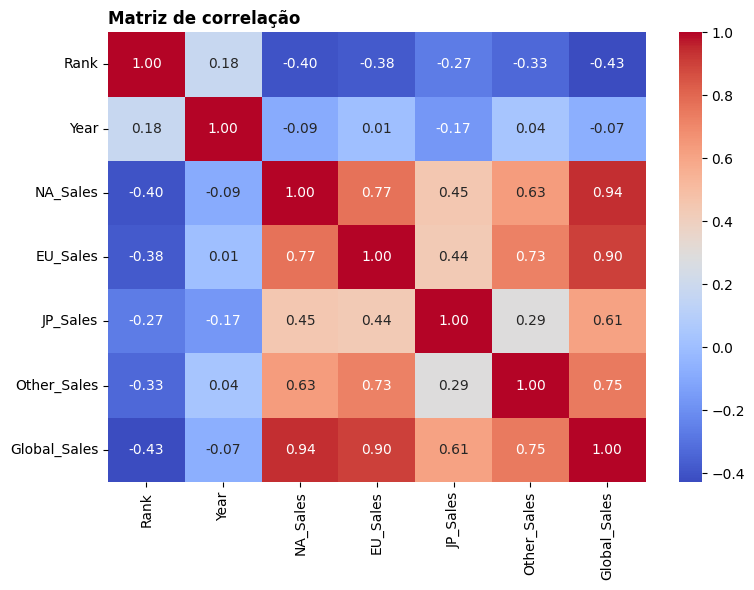

In [71]:

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação', fontweight='bold', loc='left')
plt.tight_layout()
plt.show()

## 1. Rank

### Correlação com variáveis numéricas:

- **Global_Sales**: -0.43  
- **NA_Sales**: -0.40  
- **EU_Sales**: -0.38  

Esses valores indicam uma **correlação negativa moderada** entre o **Rank** e as **vendas**. Como o ranking é ordenado do **1º lugar para baixo**, quanto **maior o volume de vendas**, **melhor a colocação no ranking** (ou seja, menor o valor de `Rank`).

### Correlação com o `Year`:

- **Year**: 0.18

Esse valor representa uma **correlação fraca e positiva**, sugerindo que **não há uma relação significativa** entre o ano de lançamento e a posição no ranking.

> Em resumo: jogos com vendas mais altas tendem a ocupar melhores posições no ranking, independentemente do ano em que foram lançados.


## 3. Vendas Regionais

### Fortes correlações positivas entre as regiões:

- **NA_Sales e EU_Sales**: 0.77  
- **NA_Sales e Global_Sales**: 0.94  
- **EU_Sales e Global_Sales**: 0.90  
- **JP_Sales e Global_Sales**: 0.61  

Esses valores indicam que **vendas em uma região tendem a acompanhar vendas em outras regiões**. Quando um jogo vende bem na América do Norte ou Europa, há grandes chances de ele também ter bom desempenho global.

> A **América do Norte (NA_Sales)** e a **Europa (EU_Sales)** têm **maior impacto nas vendas globais**, enquanto o Japão (**JP_Sales**) contribui, mas em menor escala.


## 4. Global_Sales

### Altamente correlacionada com todas as vendas regionais:

- **NA_Sales**: 0.94  
- **EU_Sales**: 0.90  

Essas correlações indicam que as **vendas na América do Norte e Europa são os principais fatores que impulsionam o total de vendas globais**.

> Embora outras regiões contribuam, é evidente que **NA_Sales** e **EU_Sales** têm o maior peso na composição do **Global_Sales**.


# 📊 Conclusão

- ✅ O **Ranking** dos jogos melhora (número menor) quanto maior for o total de vendas.

- 🌎 As **vendas nas diferentes regiões** estão fortemente relacionadas entre si, especialmente entre **América do Norte** e **Europa**.

- 📈 As **vendas globais** são fortemente influenciadas pelas vendas em **NA** e **EU**.

- 📅 O **ano de lançamento** tem pouca influência sobre as vendas e o desempenho geral do jogo.


### 🧾 Conversão de colunas categóricas para string

As colunas **Name**, **Platform**, **Genre** e **Publisher** do DataFrame `df_clean` estão sendo convertidas para o tipo `string`.

✔️ Essa conversão facilita o tratamento dessas colunas como **dados textuais**, o que é útil para:
- Operações de **filtragem**
- **Agrupamentos**
- Análises e visualizações com variáveis categóricas


In [72]:
  df_clean[["Name", "Platform", "Genre", "Publisher"]] = df_clean[["Name", "Platform", "Genre", "Publisher"]].astype("string")


### 🔄 Conversão de colunas categóricas para tipo `string`

As colunas **Name**, **Platform**, **Genre** e **Publisher** foram convertidas para o tipo `string` (`pandas.StringDtype`).

Essa mudança otimiza o **armazenamento** e a **manipulação** de dados textuais, garantindo melhor compatibilidade para análises, visualizações e operações com variáveis categóricas.


In [73]:
print(df_clean[["Name", "Platform", "Genre", "Publisher"]].dtypes)


Name         string[python]
Platform     string[python]
Genre        string[python]
Publisher    string[python]
dtype: object


### Conferindo os tipos de dados novamente

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  string 
 2   Platform      16327 non-null  string 
 3   Year          16327 non-null  Int64  
 4   Genre         16327 non-null  string 
 5   Publisher     16327 non-null  string 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: Int64(1), float64(5), int64(1), string(4)
memory usage: 1.4 MB


## Primeiramente vamos analisar quais características de jogos vendem bem em NA e EU

In [75]:
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Análise das Principais Publishers por Plataforma

## Objetivo
Identificar, para cada plataforma, a publisher com maior soma de vendas globais.

### Procedimento
- Agrupar os dados por **Platform** e **Publisher**, somando as vendas globais (`Global_Sales`).
- Para cada plataforma, selecionar a publisher com o maior total de vendas.
- Ordenar essas publishers pelas maiores vendas totais e selecionar as top 20.

### Resultado
Uma tabela com as 20 plataformas e suas respectivas publishers líderes em vendas globais, destacando que **Nintendo** e **Electronic Arts** dominam a maioria das plataformas.


In [76]:


# Agrupar por Platform e Publisher, somando as vendas globais
grouped = df_clean.groupby(['Platform', 'Publisher'], as_index=False)['Global_Sales'].sum()

# Para cada plataforma, pegar a publisher com mais vendas
top_publisher_per_platform = grouped.sort_values('Global_Sales', ascending=False).groupby('Platform').head(1)

# Ordenar pelos maiores totais de vendas e pegar os top 20
top_20 = top_publisher_per_platform.sort_values('Global_Sales', ascending=False).head(20)

# Resultado
print(top_20[['Platform', 'Publisher', 'Global_Sales']])


     Platform                    Publisher  Global_Sales
1512      Wii                     Nintendo        390.34
237        DS                     Nintendo        349.10
863       PS2              Electronic Arts        245.96
313        GB                     Nintendo        229.06
777        PS  Sony Computer Entertainment        193.73
525       NES                     Nintendo        183.97
1616     X360              Electronic Arts        177.97
1018      PS3              Electronic Arts        167.09
80        3DS                     Nintendo        156.45
502       N64                     Nintendo        129.62
374       GBA                     Nintendo        112.00
1424     SNES                     Nintendo         96.84
437        GC                     Nintendo         79.15
571        PC              Electronic Arts         71.24
1573     WiiU                     Nintendo         57.90
1703       XB              Electronic Arts         57.43
1108      PS4              Elec

# Análise das Vendas por Gênero e Publisher nas Regiões NA e EU

## Objetivo
Identificar os gêneros e publishers com maiores vendas nas regiões América do Norte (NA) e Europa (EU).

### Procedimento
- Agrupar os dados por **Genre** e **Publisher**, somando as vendas nas regiões NA e EU (`NA_Sales` e `EU_Sales`).
- Ordenar os resultados em ordem decrescente, priorizando vendas em NA e, em seguida, em EU.
- Selecionar as top 50 combinações de gênero e publisher com maiores vendas.

### Resultado
A tabela revela que gêneros como **Sports**, **Platform** e **Shooter** dominam as vendas, com publishers como **Electronic Arts**, **Nintendo** e **Activision** liderando os mercados da América do Norte e Europa.


In [77]:
df_grouped=df_clean.groupby(["Genre","Publisher"],as_index=False)[["NA_Sales","EU_Sales"]].sum()
df_grouped_sorted=df_grouped.sort_values(by=["NA_Sales","EU_Sales"],ascending=False)
top_50_genre=df_grouped_sorted.head(50)
top_50_genre.reset_index(drop=True,inplace=True)
top_50_genre

,Genre,Publisher,NA_Sales,EU_Sales
0,Sports,Electronic Arts,263.50,144.14
1,Platform,Nintendo,219.46,84.90
2,Shooter,Activision,159.15,96.86
3,Role-Playing,Nintendo,105.63,63.92
4,Action,Take-Two Interactive,101.45,70.44
5,Sports,Nintendo,98.77,66.18
6,Action,Activision,86.83,39.99
7,Shooter,Electronic Arts,81.15,56.03
8,Racing,Electronic Arts,75.52,51.20
9,Racing,Nintendo,73.55,39.75


# Frequência dos Gêneros no Top 50 de Vendas NA/EU por Publisher

### Objetivo
Quantificar a presença de cada gênero entre as 50 combinações de gênero e publisher com maiores vendas nas regiões América do Norte e Europa.

### Resultado
O gênero **Action** é o mais frequente, aparecendo 13 vezes, seguido por **Shooter** (7), **Sports** (6) e **Platform** (5). Gêneros como **Puzzle** e **Fighting** aparecem com menor frequência.


In [78]:
top_50_genre["Genre"].value_counts()

Genre
Action          13
Shooter          7
Sports           6
Platform         5
Misc             5
Role-Playing     4
Racing           4
Simulation       3
Fighting         2
Puzzle           1
Name: count, dtype: Int64

# Comparação de Vendas por Gênero nas Regiões EU e NA

## Objetivo
Identificar os gêneros com maior impacto nas vendas na Europa (EU) em comparação com a América do Norte (NA).

## Método
Soma das vendas agrupadas por gênero, utilizando as 50 maiores combinações de gênero e publisher.

## Resultado
- O gênero **Action** lidera as vendas em ambas as regiões, com **428,53 milhões** na EU e **688,60 milhões** na NA.
- Outros gêneros relevantes incluem **Sports**, **Shooter** e **Platform**, todos com vendas significativamente maiores na NA em relação à EU.
- Gêneros como **Fighting** e **Puzzle** têm menor participação, especialmente na EU.


In [79]:
# verificando o genero mais influente no EU
top_50_eu=top_50_genre.groupby("Genre")["EU_Sales"].sum()
top_50_na=top_50_genre.groupby("Genre")["NA_Sales"].sum()

top_50_comparison={
    "EU_Sales":top_50_eu,
    "NA_Sales":top_50_na,
}
comparison_sales=pd.DataFrame(top_50_comparison).sort_values(by=["EU_Sales","EU_Sales"],ascending=False).reset_index()
comparison_sales

,Genre,EU_Sales,NA_Sales
0,Action,428.53,688.60
1,Sports,282.94,526.88
2,Shooter,244.46,452.17
3,Platform,155.84,355.62
4,Misc,144.96,225.23
5,Racing,135.46,218.85
6,Role-Playing,117.36,188.06
7,Simulation,73.55,101.60
8,Fighting,29.22,69.73
9,Puzzle,26.42,55.74


# Visualização: Comparação de Vendas por Gênero entre Europa e América do Norte

O gráfico de barras empilhadas apresenta as vendas totais dos gêneros de jogos nas regiões EU (em azul) e NA (em verde).

- Cada barra mostra a soma das vendas em ambas regiões para o gênero correspondente.
- Valores são anotados dentro das barras para facilitar a leitura dos totais por região.
- Destaca visualmente a predominância da América do Norte nas vendas, especialmente em gêneros como **Action**, **Sports** e **Shooter**.


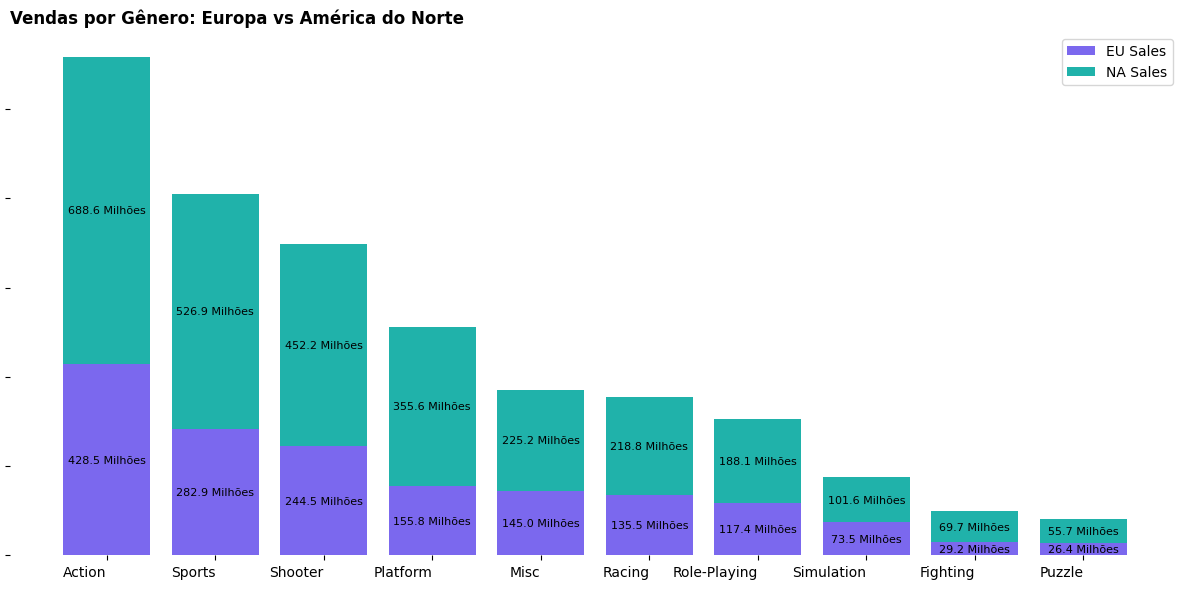

In [80]:
eu_sales = comparison_sales["EU_Sales"].values
na_sales = comparison_sales["NA_Sales"].values
genre = comparison_sales["Genre"].values

x = np.arange(len(genre))  # Posições no eixo X

fig,ax=plt.subplots(figsize=(12, 6))
# Primeiro, plotamos as barras da Europa
bar1=plt.bar(x, eu_sales, label='EU Sales', color='mediumslateblue')

# Depois, as da América do Norte, empilhadas sobre as da Europa
bar2=plt.bar(x, na_sales, bottom=eu_sales, label='NA Sales', color='lightseagreen')

# Ajustes finais
plt.xticks(x, genre, rotation=0, ha='right')
ax.set_yticklabels([])
plt.ylabel("")
plt.title('Vendas por Gênero: Europa vs América do Norte',fontweight='bold', loc='left')
plt.legend()



def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.1f} Milhões",
            xy=(bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2),  # Aqui estava o erro
            ha="center", va="center", fontsize=8, color="black"
        )
annotate_bars(bar1)
annotate_bars(bar2)

sns.despine(bottom=True,left=True)
plt.tight_layout()
plt.show()

# Agora vamos analisar o japão

# Análise de Vendas no Japão (JP_Sales)

### Principais Gêneros:
- O gênero **Platform** domina as vendas no Japão, com a Nintendo liderando em várias categorias.
- **Role-Playing** e **Sports** também são muito populares, com Nintendo e outras editoras como Square Enix e Konami Digital Entertainment em destaque.

### Top Publishers:
- A **Nintendo** é indiscutivelmente a principal editora no Japão, apresentando grandes vendas em múltiplos gêneros como Platform, Role-Playing, Puzzle e Action.
- Outras editoras importantes incluem **Square Enix**, **Namco Bandai Games**, **Capcom** e **Sony Computer Entertainment**, que mantêm forte presença no mercado japonês.

### Insights:
- A Nintendo se destaca como gigante no mercado japonês, oferecendo uma grande diversidade de jogos nas categorias Platform, Role-Playing e Sports.
- Square Enix e Namco Bandai Games consolidam um portfólio robusto especialmente no gênero Role-Playing.


| Genre        | Publisher                    | JP\_Sales |
| ------------ | ---------------------------- | --------- |
| Platform     | Nintendo                     | 102.36    |
| Role-Playing | Nintendo                     | 101.95    |
| Misc         | Nintendo                     | 55.25     |
| Sports       | Konami Digital Entertainment | 44.13     |
| Role-Playing | Square Enix                  | 41.44     |


# Análise de Vendas por Gênero e Publisher no Japão (Top 50)
Nesta etapa da análise, foi realizada uma investigação sobre os gêneros de jogos mais relevantes no mercado japonês, com base nos dados agregados de vendas (JP_Sales) por gênero e publisher.

### Passos Executados:
Agrupamento dos dados:
Os dados foram agrupados por Genre e Publisher, com a soma das vendas no Japão (JP_Sales) para cada combinação.

# Ordenação e seleção dos top 50:
Foi criada uma nova base contendo as 50 maiores combinações Genre + Publisher em vendas no Japão.

# Contagem dos gêneros mais frequentes entre os Top 50:
A contagem de aparições de cada gênero entre os 50 maiores pares Genre + Publisher no Japão foi a seguinte:

|  Gênero    |  Ocorrências |
| ------------ | -------------- |
| Role-Playing | 14             |
| Action       | 8              |
| Sports       | 7              |
| Fighting     | 6              |
| Platform     | 5              |
| Misc         | 3              |
| Simulation   | 3              |
| Strategy     | 3              |
| Racing       | 2              |
| Adventure    | 2              |
| Puzzle       | 2              |
| Shooter      | 1              |


In [81]:
df_grouped=df_clean.groupby(["Genre","Publisher"],as_index=False)["JP_Sales"].sum()
df_grouped_sorted=df_grouped.sort_values(by=["JP_Sales"],ascending=False)
top_50_genre_jp=df_grouped_sorted.head(50)
top_50_genre_jp.reset_index(drop=True,inplace=True)
top_50_genre_jp

,Genre,Publisher,JP_Sales
0,Platform,Nintendo,102.36
1,Role-Playing,Nintendo,101.95
2,Misc,Nintendo,55.25
3,Sports,Konami Digital Entertainment,44.13
4,Role-Playing,Square Enix,41.44
5,Puzzle,Nintendo,37.09
6,Role-Playing,SquareSoft,36.45
7,Sports,Nintendo,35.87
8,Role-Playing,Enix Corporation,31.26
9,Racing,Nintendo,29.22


# Análise do Mercado Japonês por Gênero

## Interpretação
O gênero Role-Playing (RPG) se destaca fortemente no mercado japonês, representando quase 1/3 das posições no ranking.

Jogos de ação e esporte também possuem presença significativa.

A diversidade de gêneros evidencia uma preferência mais ampla e nichada do público japonês, com títulos de estratégia, simulação e luta ocupando lugar de destaque.

## Conclusão
A análise mostra que o mercado japonês valoriza especialmente o gênero RPG, seguido por jogos de ação, esporte e luta. Essa tendência pode estar relacionada à cultura local, que tradicionalmente favorece narrativas profundas, personagens complexos e estilos de jogo táticos.

---

Caso deseje, posso gerar uma visualização gráfica para essa distribuição por gênero. Deseja que eu faça?


In [82]:
top_50_genre_jp["Genre"].value_counts()

Genre
Role-Playing    11
Action           7
Fighting         6
Sports           6
Misc             4
Platform         3
Strategy         3
Simulation       3
Puzzle           2
Racing           2
Adventure        2
Shooter          1
Name: count, dtype: Int64

# Comparação de Vendas por Gênero: América do Norte, Europa e Japão

## Objetivo
Comparar os gêneros mais influentes nas vendas por região (Europa, América do Norte e Japão), utilizando os 50 principais pares Genre + Publisher em vendas em cada região.

## Etapas do Código

### Agrupamento Regional por Gênero
- Calculou-se a soma das vendas para cada gênero nas regiões:
  - **EU_Sales**: Europa
  - **NA_Sales**: América do Norte
  - **JP_Sales**: Japão

### Criação do DataFrame de Comparação
- Os dados de cada região foram unidos (join) em um único DataFrame com base no gênero.
- Valores faltantes foram preenchidos com 0 (`fillna(0)`), garantindo uniformidade para comparação.
- O resultado foi ordenado pela influência na Europa (coluna `EU_Sales`), usando como critérios secundários as vendas em NA e JP.

### Renomeação de Colunas
- As colunas foram padronizadas para: `Genre`, `EU_Sales`, `NA_Sales`, `JP_Sales`.

## Resultado
O DataFrame final, `comparison_sales`, permite uma análise direta das preferências de gênero por região, contendo:
- 13 gêneros distintos.
- Vendas totais em milhões de unidades para cada região.
- Ordenação principal pela performance na Europa, facilitando comparações de impacto regional.


In [83]:
# verificando o genero mais influente no EU
top_50_eu=top_50_genre.groupby("Genre")["EU_Sales"].sum()
top_50_na=top_50_genre.groupby("Genre")["NA_Sales"].sum()
top_50_jp=top_50_genre_jp.groupby("Genre")["JP_Sales"].sum()

top_50_comparison={
    "EU_Sales":top_50_eu,
    "NA_Sales":top_50_na,
    "JP_Sales":top_50_jp,
}
comparison_sales = top_50_eu.to_frame().join(
    top_50_na.to_frame(), how='outer', lsuffix='_EU', rsuffix='_NA'
).join(
    top_50_jp.to_frame(), how='outer'
).fillna(0).reset_index()

# Renomear as colunas
comparison_sales.columns = ["Genre", "EU_Sales", "NA_Sales", "JP_Sales"]


comparison_sales = comparison_sales.sort_values(by=["EU_Sales", "EU_Sales", "JP_Sales"], ascending=False).reset_index(drop=True)


# Objetivo
Visualizar e comparar a performance dos gêneros de jogos eletrônicos nas três principais regiões de mercado: Europa (EU), América do Norte (NA) e Japão (JP).

# Descrição Técnica

### Filtro de Gêneros Relevantes
Foram considerados apenas gêneros com vendas totais maiores que zero em pelo menos uma das regiões.

### Preparação dos Dados para o Gráfico
- As vendas por região foram extraídas separadamente e armazenadas em arrays (`eu_sales`, `na_sales`, `jp_sales`).
- A variável `genre` representa os nomes dos gêneros.

### Criação do Gráfico de Barras Empilhadas
- Utilizou-se `matplotlib.pyplot` para desenhar barras empilhadas:
  - Barra 1: Europa (`EU_Sales`) – cor: *mediumslateblue*
  - Barra 2: América do Norte (`NA_Sales`) – empilhada sobre a Europa, cor: *lightseagreen*
  - Barra 3: Japão (`JP_Sales`) – empilhada sobre as anteriores, cor: *salmon*

### Anotações e Legibilidade
- Anotações internas em cada camada da barra com o valor em milhões.
- Anotação superior com a soma total por gênero.
- Legenda adicionada e eixos estilizados para melhor visualização.

# Resultado
O gráfico evidencia claramente quais gêneros dominam em cada mercado. Por exemplo:
- *Action* lidera com ampla vantagem no total de vendas.
- *Role-Playing* tem destaque principalmente no Japão.
- *Platform* e *Sports* se mostram fortes tanto na América do Norte quanto na Europa.


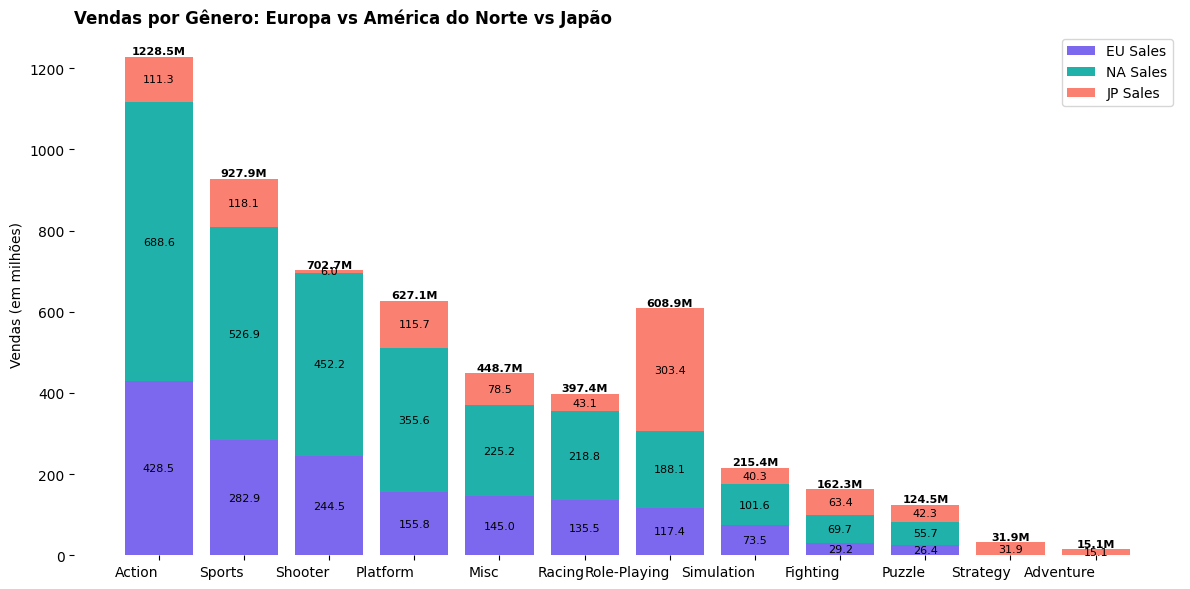

In [84]:
# Filtrar gêneros com vendas > 0
mask = (comparison_sales[['EU_Sales', 'NA_Sales', 'JP_Sales']].sum(axis=1) > 0)
filtered_df = comparison_sales[mask]

eu_sales = filtered_df["EU_Sales"].values
na_sales = filtered_df["NA_Sales"].values
jp_sales = filtered_df["JP_Sales"].values
genre = filtered_df["Genre"].values

x = np.arange(len(genre))

fig, ax = plt.subplots(figsize=(12, 6))

# Barras empilhadas
bar1 = ax.bar(x, eu_sales, label='EU Sales', color='mediumslateblue')
bar2 = ax.bar(x, na_sales, bottom=eu_sales, label='NA Sales', color='lightseagreen')
bar3 = ax.bar(x, jp_sales, bottom=eu_sales + na_sales, label='JP Sales', color='salmon')

# Rótulos no eixo X
ax.set_xticks(x)
ax.set_xticklabels(genre, rotation=0, ha='right')

ax.set_ylabel("Vendas (em milhões)")
ax.set_title('Vendas por Gênero: Europa vs América do Norte vs Japão', fontweight='bold', loc='left')
ax.legend()

# Função para anotar os valores no centro das barras
def annotate_bars(bars, base_heights):
    for bar, base in zip(bars, base_heights):
        height = bar.get_height()
        if height > 0:
            ax.annotate(f"{height:.1f}",
                        xy=(bar.get_x() + bar.get_width() / 2, base + height / 2),
                        ha="center", va="center", fontsize=8, color="black")

# Anotar valores internos
annotate_bars(bar1, np.zeros_like(eu_sales))
annotate_bars(bar2, eu_sales)
annotate_bars(bar3, eu_sales + na_sales)

# Anotar total no topo
totals = eu_sales + na_sales + jp_sales
for i in range(len(x)):
    ax.annotate(f"{totals[i]:.1f}M",
                xy=(x[i], totals[i] + 1.5),
                ha="center", va="bottom", fontsize=8, fontweight='bold')

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.show()


# Objetivo:
Investigar quais gêneros e publishers mais vendem no mercado japonês, comparando com o desempenho em outras regiões.

### 📊 Passos sugeridos:

1. **Agrupar por Gênero e Publisher, somando as vendas no Japão:**
   - Realizar agrupamento dos dados por `Genre` e `Publisher`, somando a coluna `JP_Sales`.

2. **Frequência dos Gêneros entre os Top 50 no Japão:**
   - Selecionar as 50 combinações de gênero e publisher com maiores vendas no Japão.
   - Analisar a frequência de cada gênero nesse top.

3. **Comparar os gêneros que mais vendem no Japão com NA e EU:**
   - Criar uma tabela de comparação semelhante à `comparison_sales`, mas focada em `JP_Sales`.
   - Avaliar diferenças culturais e preferências regionais.

4. **Visualização de Vendas por Gênero – Japão vs Outras Regiões:**
   - Construir gráficos de barras empilhadas ou múltiplas barras para as vendas em JP, NA e EU.
   - Destacar os gêneros com maior destaque no Japão em relação às outras regiões.


In [85]:
df_influente_vendas=df_clean.sort_values(by="Global_Sales",ascending=False).head(20)
df_influente_vendas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


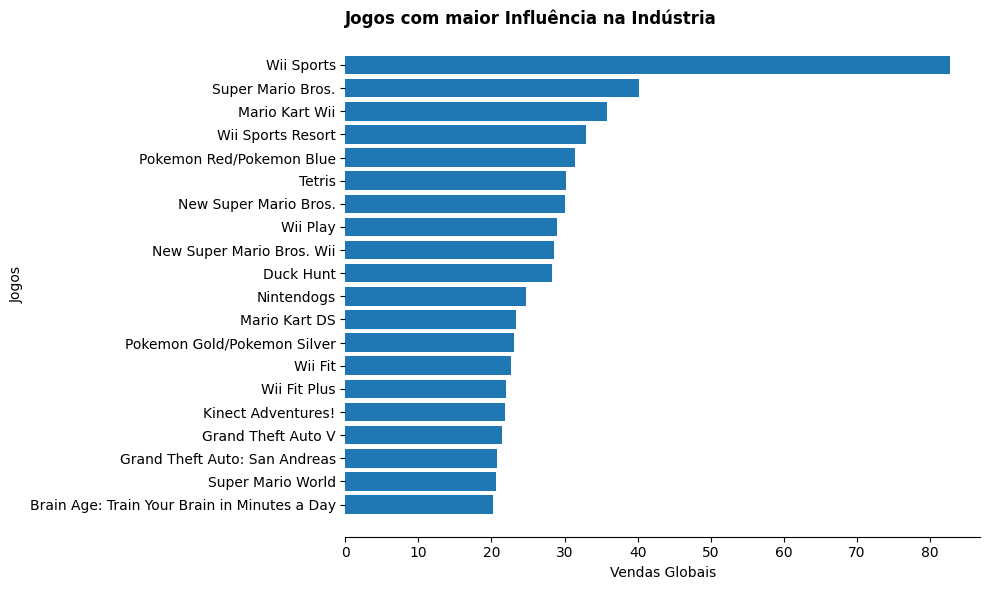

In [86]:
plt.figure(figsize=(10,6))

# Ordena o DataFrame antes de plotar
df_sorted = df_influente_vendas.sort_values("Global_Sales", ascending=True)

plt.barh(df_sorted["Name"], df_sorted["Global_Sales"])
plt.title("Jogos com maior Influência na Indústria", fontweight="bold", loc="left")
plt.xlabel("Vendas Globais")
plt.ylabel("Jogos")
plt.tight_layout()
sns.despine(left=True, bottom=False)
plt.show()


# Função categorize_decada(x)

Esta função categoriza um ano (`x`) dentro de um intervalo de décadas pré-definidas. Ela retorna uma string correspondente à década em que o ano se encaixa:

```python
def categorize_decada(x):
    if pd.isna(x):
        return 'Desconhecido'
    elif 1980 <= x < 1990:
        return '1980s'
    elif 1990 <= x < 2000:
        return '1990s'
    elif 2000 <= x < 2010:
        return '2000s'
    elif 2010 <= x < 2020:
        return '2010s'
    elif 2020 <= x < 2030:
        return '2020s'
    else:
        return 'Outros'


In [87]:
def cateforize_decada(x):
  if x>=1980 and x<1990:
    return "1980-1990"
  elif x>=1990 and x<2000:
    return "1990-2000"
  elif x>=2000 and x<=2010:
    return "2000-2010"
  else:
    return "2010-2020"

# Aplicação da função ao DataFrame

A função `categorize_decada` é aplicada à coluna `Year` do DataFrame `df_clean` usando o método `apply`. O resultado é salvo em uma nova coluna chamada `Decada`.

Essa nova coluna categórica facilita análises agregadas por períodos de tempo, como comparações de vendas por década.

```python
df_clean['Decada'] = df_clean['Year'].apply(categorize_decada)


In [88]:
df_clean = df_clean.copy()
df_clean.loc[:, "Decada"] = df_clean["Year"].apply(cateforize_decada)


# Funções pandas para análise de frequência e ordenação

- `value_counts()` (pandas.Series): Conta a frequência de valores únicos em uma Series, útil para entender a distribuição de categorias ou valores discretos.

- `sort_index()` (pandas.Series): Ordena a Series ou DataFrame pelo índice, permitindo organizar os dados em ordem crescente ou decrescente de acordo com os rótulos do índice.


In [89]:
decade_counts= df_clean["Decada"].value_counts().sort_index()

# Cálculo do aumento percentual de jogos lançados por década

Esta análise consiste em:

- Contar o total de jogos lançados em cada década, usando a coluna `Decada` do DataFrame `df_clean`.
- Calcular o aumento percentual do número de jogos lançados entre décadas consecutivas.
- Interpretar esses resultados para entender a evolução quantitativa dos lançamentos ao longo do tempo, identificando períodos de crescimento ou retração no mercado de jogos.


In [90]:
decade_counts = df_clean["Decada"].value_counts().sort_index()
print(decade_counts)

aumento_percentual = {}
decadas = list(decade_counts.index)

for i in range(1, len(decadas)):  # Começando do índice 1
    decada_atual = decadas[i]
    decada_anterior = decadas[i-1]
    count_atual = decade_counts[decada_atual]
    count_anterior = decade_counts[decada_anterior]

    aumento = ((count_atual - count_anterior) / count_anterior) * 100
    aumento_percentual[f"O aumento de {decada_anterior} para {decada_atual}"] = f"{aumento:.2f}%"

print("Aumento Percentual de Jogos Lançados por Década:")
for aumento, porcentagem in aumento_percentual.items():
    print(f"{aumento}: {porcentagem}")

Decada
1980-1990      205
1990-2000     1769
2000-2010    10467
2010-2020     3886
Name: count, dtype: int64
Aumento Percentual de Jogos Lançados por Década:
O aumento de 1980-1990 para 1990-2000: 762.93%
O aumento de 1990-2000 para 2000-2010: 491.69%
O aumento de 2000-2010 para 2010-2020: -62.87%


# Análise dos principais publishers por plataforma com base nas vendas globais

Este código realiza as seguintes operações:

1. Agrupa os dados por `Platform` e `Publisher`, somando as vendas globais (`Global_Sales`).
2. Para cada plataforma, identifica o publisher com o maior total de vendas.
3. Ordena esses publishers top por volume de vendas e seleciona os 20 maiores.
4. Exibe a tabela final contendo plataforma, publisher e total de vendas globais.

Esse procedimento destaca os publishers mais relevantes em cada plataforma, facilitando análises comparativas e estratégicas.


In [91]:


# Agrupar por Platform e Publisher, somando as vendas globais
grouped = df_clean.groupby(['Platform', 'Publisher'], as_index=False)['Global_Sales'].sum()

# Para cada plataforma, pegar a publisher com mais vendas
top_publisher_per_platform = grouped.sort_values('Global_Sales', ascending=False).groupby('Platform').head(1)

# Ordenar pelos maiores totais de vendas e pegar os top 20
top_20 = top_publisher_per_platform.sort_values('Global_Sales', ascending=False).head(20)

# Resultado
print(top_20[['Platform', 'Publisher', 'Global_Sales']])


     Platform                    Publisher  Global_Sales
1512      Wii                     Nintendo        390.34
237        DS                     Nintendo        349.10
863       PS2              Electronic Arts        245.96
313        GB                     Nintendo        229.06
777        PS  Sony Computer Entertainment        193.73
525       NES                     Nintendo        183.97
1616     X360              Electronic Arts        177.97
1018      PS3              Electronic Arts        167.09
80        3DS                     Nintendo        156.45
502       N64                     Nintendo        129.62
374       GBA                     Nintendo        112.00
1424     SNES                     Nintendo         96.84
437        GC                     Nintendo         79.15
571        PC              Electronic Arts         71.24
1573     WiiU                     Nintendo         57.90
1703       XB              Electronic Arts         57.43
1108      PS4              Elec

# --- Análise: Top 1 jogo por plataforma para publishers selecionados ---

Este trecho de código tem o objetivo de identificar, para cada plataforma de videogame, o jogo de maior sucesso em vendas globais dentre três publishers selecionados: **Nintendo**, **Electronic Arts** e **Sony Computer Entertainment**.

---

### Passo 1: Define uma ordem personalizada para as plataformas

Estabelecemos uma ordem fixa para as plataformas para garantir uma apresentação consistente dos dados.

```python
platform_order = ['Wii', 'DS', 'PS2', 'GB', 'PS', 'NES', 'X360', 'PS3', '3DS', 'N64',
                  'GBA', 'SNES', 'GC', 'PC', 'WiiU', 'XB', 'PS4', 'PSP', '2600', 'XOne']


In [92]:
# --- Análise: Top 1 jogo por plataforma para publishers selecionados ---

# Passo 1: Define uma ordem personalizada para as plataformas, para manter a consistência na apresentação
platform_order = ['Wii', 'DS', 'PS2', 'GB', 'PS', 'NES', 'X360', 'PS3', '3DS', 'N64',
                  'GBA', 'SNES', 'GC', 'PC', 'WiiU', 'XB', 'PS4', 'PSP', '2600', 'XOne']

# Passo 2: Filtra os dados para considerar apenas os publishers "Nintendo", "Electronic Arts" e "Sony Computer Entertainment"
df_filtered = df_clean.copy()
df_filtered = df_filtered[df_filtered["Publisher"].isin(["Nintendo", "Electronic Arts", "Sony Computer Entertainment"])]

# Ordena o DataFrame filtrado pelas colunas 'Platform' e 'Global_Sales' (vendas globais decrescentes)
df_filtered_sorted = df_filtered.sort_values(["Platform", "Global_Sales"], ascending=[True, False])

# Passo 3: Para cada plataforma, seleciona o jogo com maior venda global (top 1)
top_20_names = df_filtered_sorted.groupby("Platform").head(1)

# Passo 4: Remove colunas que não são relevantes para essa análise final
top_20_names = top_20_names.drop(columns=["Year", "Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Rank"])

# Passo 5: Reorganiza o DataFrame para seguir a ordem personalizada de plataformas
top_20_names['Platform'] = pd.Categorical(top_20_names['Platform'], categories=platform_order, ordered=True)
top_20_names = top_20_names.sort_values('Platform')

# Passo 6: Remove possíveis linhas com valores ausentes, garantindo limpeza dos dados
top_20_names = top_20_names.dropna()

# Exibe o resultado final com o top 1 jogo por plataforma para os publishers selecionados
top_20_names


,Name,Platform,Publisher,Global_Sales,Decada
0,Wii Sports,Wii,Nintendo,82.74,2000-2010
6,New Super Mario Bros.,DS,Nintendo,30.01,2000-2010
28,Gran Turismo 3: A-Spec,PS2,Sony Computer Entertainment,14.98,2000-2010
4,Pokemon Red/Pokemon Blue,GB,Nintendo,31.37,1990-2000
52,Gran Turismo,PS,Sony Computer Entertainment,10.95,1990-2000
1,Super Mario Bros.,NES,Nintendo,40.24,1980-1990
99,Battlefield 3,X360,Electronic Arts,7.34,2010-2020
54,Gran Turismo 5,PS3,Sony Computer Entertainment,10.77,2000-2010
32,Pokemon X/Pokemon Y,3DS,Nintendo,14.35,2010-2020
46,Super Mario 64,N64,Nintendo,11.89,1990-2000


# Contagem de Jogos Top 1 por Publisher

Neste trecho, contamos quantos jogos do top 1 por plataforma pertencem a cada um dos três publishers selecionados, e preparamos listas para uso em gráficos.

---

### Passo 1: Contar quantos jogos de top 1 há por publisher

```python
publisher_counts = top_20_names["Publisher"].value_counts()
nintendo_counts = publisher_counts["Nintendo"]
eletronic_counts = publisher_counts["Electronic Arts"]
sony_counts = publisher_counts["Sony Computer Entertainment"]


In [93]:
publisher_counts=top_20_names["Publisher"].value_counts()
nintendo_counts=publisher_counts["Nintendo"]
eletronic_counts=publisher_counts["Electronic Arts"]
sony_counts=publisher_counts["Sony Computer Entertainment"]
sizes=[nintendo_counts,eletronic_counts,sony_counts]
labels=["Nintendo","Electronic Arts","Sony Computer Entertainment"]
colors=["cyan","purple","orange"]

### Gráfico de Pizza (Donut) mostrando a relevância das maiores publishers

Este gráfico de pizza representa a participação percentual das três maiores publishers (Nintendo, Electronic Arts e Sony Computer Entertainment) entre os jogos mais relevantes por plataforma na pesquisa.

```python
fig, ax = plt.subplots(figsize=(10,6))

plt.pie(sizes, colors=colors, labels=labels, autopct="%1.1f%%", wedgeprops={
    "linewidth": 2,
    "edgecolor": "black"
})

# Cria um círculo branco no centro para o efeito "donut"
center_circle = plt.Circle((0, 0), 0.4, fc="white", ec="black")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Relevância entre as maiores Publisher dessa pesquisa", fontsize=12, fontweight="bold", loc="left")
plt.tight_layout()
plt.show()


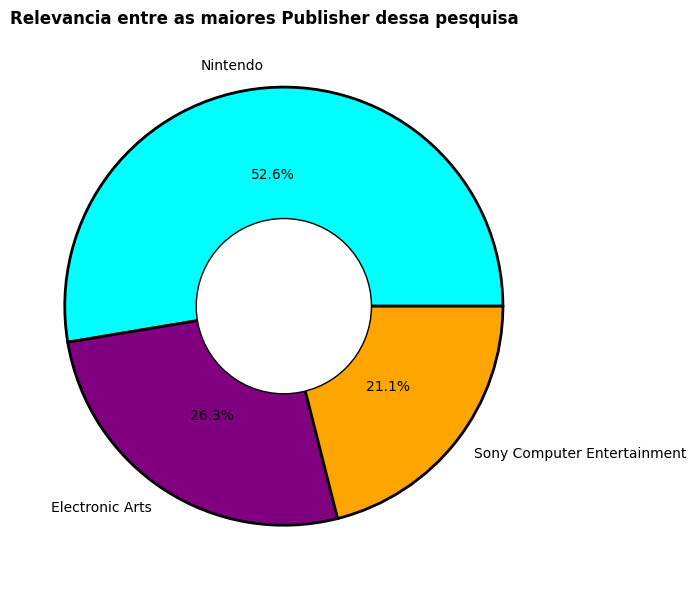

In [94]:
fig, ax = plt.subplots(figsize=(10,6))

plt.pie(sizes,colors=colors,labels=labels,autopct="%1.1f%%",wedgeprops={
    "linewidth":2,
    "edgecolor":"black"
})
center_circle=plt.Circle((0,0),0.4,fc="white",ec="black")
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Relevancia entre as maiores Publisher dessa pesquisa",fontsize=12,fontweight="bold",loc="left")
plt.tight_layout()
plt.show()

## Análise: Top 20 combinações de Plataforma e Publisher por vendas globais

Neste trecho, agrupamos os dados por `Platform` e `Publisher`, somando as vendas globais (`Global_Sales`). Em seguida, ordenamos para obter as 20 combinações com maiores vendas totais.

```python
platform_publisher_sales = (
    df_clean.groupby(["Platform", "Publisher"])["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)

platform_publisher_sales
| Platform | Publisher                   | Global\_Sales |
| -------- | --------------------------- | ------------- |
| Wii      | Nintendo                    | 390.34        |
| DS       | Nintendo                    | 349.10        |
| PS2      | Electronic Arts             | 245.96        |
| GB       | Nintendo                    | 229.06        |
| PS       | Sony Computer Entertainment | 193.73        |
| NES      | Nintendo                    | 183.97        |
| X360     | Electronic Arts             | 177.97        |
| PS2      | Sony Computer Entertainment | 172.80        |
| PS3      | Electronic Arts             | 167.09        |
| X360     | Microsoft Game Studios      | 165.16        |
| X360     | Activision                  | 158.75        |
| 3DS      | Nintendo                    | 156.45        |
| PS3      | Sony Computer Entertainment | 145.76        |
| N64      | Nintendo                    | 129.62        |
| PS3      | Activision                  | 126.39        |
| GBA      | Nintendo                    | 112.00        |
| SNES     | Nintendo                    | 96.84         |
| X360     | Take-Two Interactive        | 95.90         |
| Wii      | Ubisoft                     | 92.21         |
| PS2      | Take-Two Interactive        | 90.61         |


In [95]:
platform_publisher_sales=df_clean.groupby(["Platform","Publisher"])["Global_Sales"].sum().sort_values(ascending=False).head(20).reset_index()
platform_publisher_sales


,Platform,Publisher,Global_Sales
0,Wii,Nintendo,390.34
1,DS,Nintendo,349.10
2,PS2,Electronic Arts,245.96
3,GB,Nintendo,229.06
4,PS,Sony Computer Entertainment,193.73
5,NES,Nintendo,183.97
6,X360,Electronic Arts,177.97
7,PS2,Sony Computer Entertainment,172.80
8,PS3,Electronic Arts,167.09
9,X360,Microsoft Game Studios,165.16


## Vamos analisar o ciclo de vida das plataformas


In [96]:
df_clean.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000


## Análise: Ciclo de Vida das Plataformas de Jogos

Neste código, calculamos o tempo de vida de cada plataforma baseado nos anos de lançamento e descontinuação registrados no dataset.

### Passos:

1. Agrupamos os dados pela coluna `Platform` e calculamos o ano mínimo (`min`) e máximo (`max`) de lançamento dos jogos para cada plataforma.
2. Renomeamos as colunas para facilitar a interpretação:  
   - `Ano Lançamento` → ano do primeiro jogo lançado na plataforma  
   - `Ano de Descontinuação` → ano do último jogo lançado na plataforma  
3. Calculamos o `Tempo de Vida` como a diferença entre o ano de descontinuação e o ano de lançamento.
4. Ordenamos o DataFrame pelo `Tempo de Vida` em ordem decrescente para destacar as plataformas mais longevas.
5. Resetamos o índice para melhor apresentação.

```python
platform_life_cycle = df_clean.groupby("Platform")["Year"].agg(["min", "max"]).reset_index()
platform_life_cycle.columns = ["Platform", "Ano Lançamento", "Ano de Descontinuação"]
platform_life_cycle["Tempo de Vida"] = platform_life_cycle["Ano de Descontinuação"] - platform_life_cycle["Ano Lançamento"]
platform_life_cycle = platform_life_cycle.sort_values(by="Tempo de Vida", ascending=False)
platform_life_cycle = platform_life_cycle.reset_index(drop=True)
platform_life_cycle


In [97]:
platform_life_cycle=df_clean.groupby("Platform")["Year"].agg(["min","max"]).reset_index()
platform_life_cycle.columns=["Platform","Ano Lançamento","Ano de Descontinuação"]
platform_life_cycle["Tempo de Vida"]=platform_life_cycle["Ano de Descontinuação"]-platform_life_cycle["Ano Lançamento"]
platform_life_cycle=platform_life_cycle.sort_values(by="Tempo de Vida",ascending=False)
platform_life_cycle=platform_life_cycle.reset_index(drop=True)
platform_life_cycle

,Platform,Ano Lançamento,Ano de Descontinuação,Tempo de Vida
0,DS,1985,2020,35
1,PC,1985,2016,31
2,GB,1988,2001,13
3,NES,1983,1994,11
4,X360,2005,2016,11
5,PSP,2004,2015,11
6,PS2,2000,2011,11
7,PS3,2006,2016,10
8,DC,1998,2008,10
9,Wii,2006,2015,9


## Verificação de Dados Nulos no Ciclo de Vida das Plataformas

Antes de analisar o ciclo de vida das plataformas, verificamos se existem valores ausentes nas colunas críticas:

- **Platform** (nome da plataforma)
- **Ano Lançamento** (ano do primeiro jogo registrado)
- **Ano de Descontinuação** (ano do último jogo registrado)

O código abaixo realiza essa checagem:

```python
platform_life_cycle[["Platform", "Ano Lançamento", "Ano de Descontinuação"]].isnull().sum()


In [98]:
platform_life_cycle[["Platform", "Ano Lançamento", "Ano de Descontinuação"]].isnull().sum()


Platform                 0
Ano Lançamento           0
Ano de Descontinuação    0
dtype: int64

## Seleção das Top 10 Plataformas por Tempo de Vida

Para focar na análise das plataformas com maior longevidade no mercado, calculamos o tempo de vida de cada plataforma e selecionamos as 10 com maior duração.

- Calcula o tempo de vida subtraindo o ano de lançamento do ano de descontinuação.
- Ordena as plataformas pelo tempo de vida em ordem decrescente.
- Seleciona as top 10 plataformas com maior tempo de vida.

```python
platform_life_cycle["Tempo de Vida"] = platform_life_cycle["Ano de Descontinuação"] - platform_life_cycle["Ano Lançamento"]
platform_life_cycle = platform_life_cycle.sort_values("Tempo de Vida", ascending=False).head(10)


In [99]:
# Exemplo: manter apenas as top 10 por tempo de vida
platform_life_cycle["Tempo de Vida"] = platform_life_cycle["Ano de Descontinuação"] - platform_life_cycle["Ano Lançamento"]
platform_life_cycle = platform_life_cycle.sort_values("Tempo de Vida", ascending=False).head(10)


## Visualização do Ciclo de Vida das Plataformas

Este gráfico de linha horizontal mostra o período de atividade (de lançamento até descontinuação) das top 10 plataformas com maior tempo de vida no mercado.

- Cada linha representa uma plataforma.
- O eixo X indica os anos, desde o lançamento até a descontinuação.
- O eixo Y lista as plataformas.

```python
fig, ax = plt.subplots(figsize=(12, 6))

# Traçar cada linha
for _, row in platform_life_cycle.iterrows():
    ax.hlines(
        y=row["Platform"],
        xmin=row["Ano Lançamento"],
        xmax=row["Ano de Descontinuação"],
        color="skyblue",
        linewidth=4
    )

# Estética
ax.set_xlabel("Ano", fontsize=12)
ax.set_ylabel("Plataforma", fontsize=12)
ax.set_title("Ciclo de Vida das Plataformas", fontweight="bold", loc="left", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


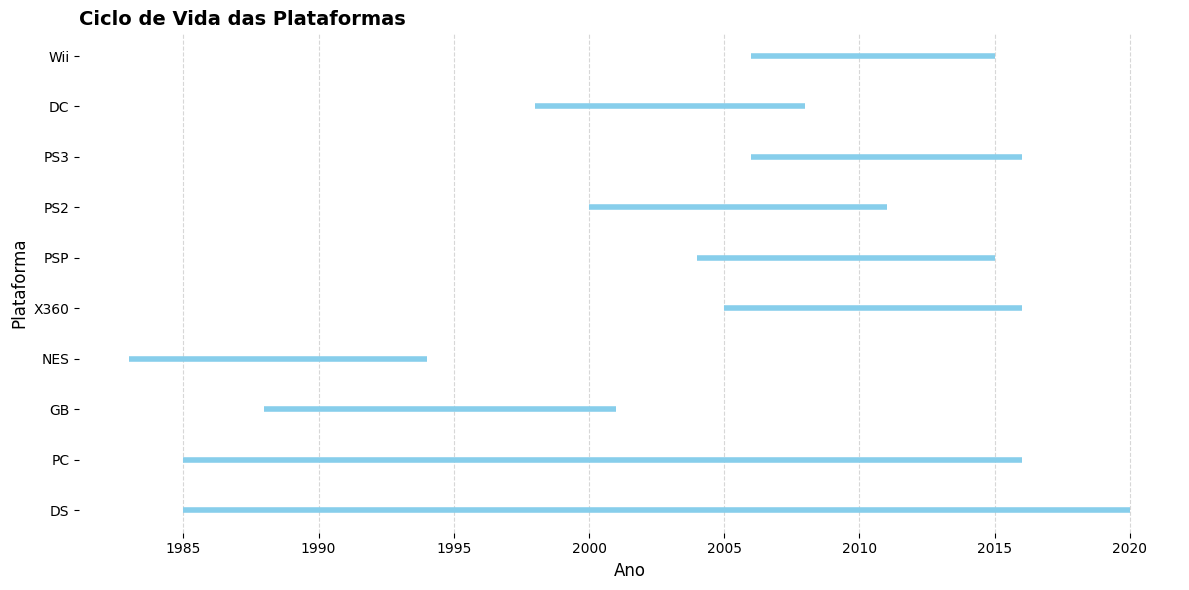

In [100]:

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Traçar cada linha
for _, row in platform_life_cycle.iterrows():
    ax.hlines(
        y=row["Platform"],
        xmin=row["Ano Lançamento"],
        xmax=row["Ano de Descontinuação"],
        color="skyblue",
        linewidth=4
    )

# Estética
ax.set_xlabel("Ano", fontsize=12)
ax.set_ylabel("Plataforma", fontsize=12)
ax.set_title("Ciclo de Vida das Plataformas", fontweight="bold", loc="left", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


## quais gêneros mais vendem em cada plataforma

In [101]:
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decada
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2010
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1990
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2010
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2010
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-2000


# Análise de Vendas Globais por Gênero e Plataforma

O DataFrame `vendas_por_genero_plat` agrupa as vendas globais de jogos eletrônicos, segmentando os dados por plataforma e gênero de jogo. 

## Descrição dos Dados

| Coluna      | Descrição                                 |
|-------------|-------------------------------------------|
| Platform    | Plataforma onde o jogo foi lançado        |
| Genre       | Gênero do jogo                            |
| Global_Sales| Soma das vendas globais (em milhões)     |

## Informações Importantes

- O agrupamento é feito considerando todas as plataformas e gêneros presentes na base.
- O objetivo é entender quais gêneros têm maior representatividade em vendas para cada plataforma.
- O total de registros é 293, correspondendo a combinações plataforma + gênero.

## Próximos Passos Sugeridos

- Visualizar os dados com gráficos de barras ou heatmaps para identificar padrões.
- Comparar os gêneros mais vendidos entre plataformas.
- Analisar tendências específicas de gêneros em plataformas populares.

---

Esse agrupamento é útil para identificar estratégias de mercado focadas em plataformas específicas e para entender a demanda por diferentes tipos de jogos ao longo do tempo.


In [102]:
vendas_por_genero_plat=df_clean.groupby(["Platform","Genre"])["Global_Sales"].sum().reset_index()
vendas_por_genero_plat

,Platform,Genre,Global_Sales
0,2600,Action,26.39
1,2600,Adventure,0.40
2,2600,Fighting,0.77
3,2600,Misc,3.58
4,2600,Platform,13.27
...,...,...,...
288,XOne,Role-Playing,9.48
289,XOne,Shooter,51.61
290,XOne,Simulation,0.54
291,XOne,Sports,23.97


# Identificação do Gênero com Maior Venda por Plataforma

Neste passo, identificamos o gênero de jogo que obteve a maior receita global para cada plataforma.

## Procedimento

- O DataFrame `vendas_por_genero_plat` contém as vendas globais por plataforma e gênero.
- Ordenamos os dados pela coluna `Global_Sales` em ordem decrescente.
- Selecionamos apenas o primeiro registro de cada plataforma (`drop_duplicates`), que corresponde ao gênero com maior venda naquela plataforma.
- Ordenamos os resultados em ordem crescente de vendas para facilitar visualização.

## Resultado

| Platform | Genre         | Global_Sales (milhões) |
|----------|---------------|-----------------------|
| (exemplos aqui para você substituir ou deixar direto o DataFrame) |

Este resumo permite entender rapidamente qual gênero domina as vendas para cada plataforma, auxiliando na análise de preferências do mercado por sistema de jogos.

---


In [103]:
melhor_genero_por_plat=vendas_por_genero_plat.sort_values(by="Global_Sales",ascending=False).drop_duplicates("Platform")
melhor_genero_por_plat=melhor_genero_por_plat.sort_values(by="Global_Sales",ascending=True)
melhor_genero_por_plat

,Platform,Genre,Global_Sales
128,PCFX,Role-Playing,0.03
91,GG,Platform,0.04
10,3DO,Adventure,0.06
230,TG16,Adventure,0.14
232,WS,Role-Playing,1.22
114,NG,Fighting,1.42
214,SCD,Platform,1.50
33,DC,Sports,3.66
203,SAT,Fighting,8.52
85,GEN,Platform,15.45


# Gráfico: Gênero Mais Vendido por Plataforma

Este gráfico de barras horizontal mostra o gênero com maior receita global para cada plataforma.

- O eixo **x** representa as vendas globais em milhões.
- O eixo **y** mostra as plataformas de jogos.
- Cada barra é colorida pelo gênero correspondente, com legenda para facilitar a identificação.

```python
plt.figure(figsize=(12,8))
sns.barplot(
    data=melhor_genero_por_plat,
    x="Global_Sales",
    y="Platform",
    hue="Genre",
    dodge=False
)
plt.title('Gênero mais vendido por Plataforma', fontsize=16, fontweight='bold')
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Plataforma')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


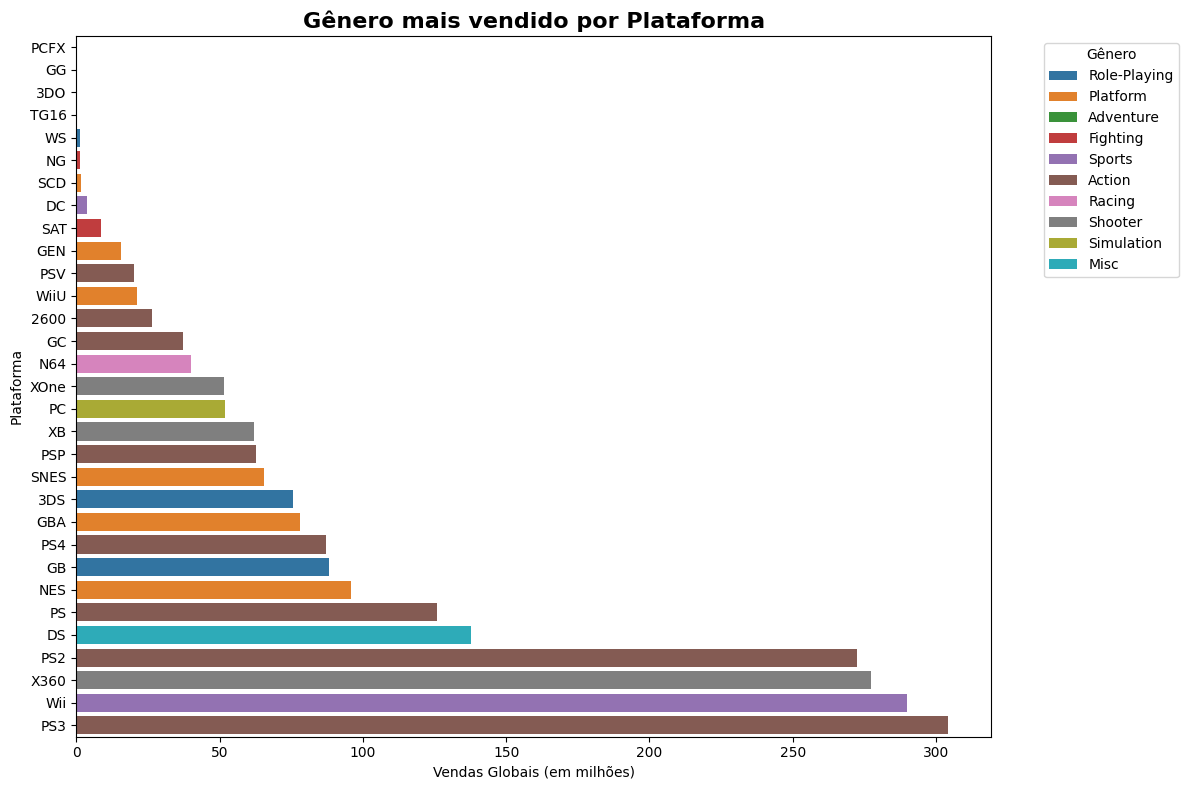

In [104]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=melhor_genero_por_plat,
    x="Global_Sales",
    y="Platform",
    hue="Genre",
    dodge=False
)
plt.title('Gênero mais vendido por Plataforma', fontsize=16, fontweight='bold')
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Plataforma')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Vamos analisar o impacto de publishers conhecidos vs. desconhecidos nas vendas globais, usando o df_clean como base

# Filtragem de Publishers Conhecidas

Neste passo, definimos como **publishers conhecidas** aquelas que lançaram mais de 50 jogos no dataset.

- Calculamos a contagem de jogos por publisher usando `value_counts()`.
- Filtramos para manter apenas aquelas com mais de 50 lançamentos.
- O resultado é um índice contendo os nomes dessas publishers consideradas relevantes para a análise.

```python
conhecidas = df_clean['Publisher'].value_counts()
conhecidas = conhecidas[conhecidas > 50].index


In [105]:
# Publishers que lançaram mais de 50 jogos serão consideradas conhecidas
conhecidas = df_clean['Publisher'].value_counts()
conhecidas = conhecidas[conhecidas > 50].index


# Classificação dos Publishers como Conhecidas ou Desconhecidas

Neste passo, adicionamos uma nova coluna ao dataframe para categorizar cada publisher como **Conhecida** ou **Desconhecida**.

- Utilizamos a lista `conhecidas` criada anteriormente, que contém publishers com mais de 50 jogos lançados.
- Para cada registro, aplicamos uma função que classifica o publisher como "Conhecida" se estiver na lista, caso contrário como "Desconhecida".
- Isso facilita análises futuras diferenciando publishers mais relevantes das menos presentes.

```python
df_clean['Publisher_Type'] = df_clean['Publisher'].apply(
    lambda x: 'Conhecida' if x in conhecidas else 'Desconhecida'
)


In [109]:
df_clean = df_clean.copy()
df_clean['Publisher_Type'] = df_clean['Publisher'].apply(
    lambda x: 'Conhecida' if x in conhecidas else 'Desconhecida'
)


## Vendas Globais por Tipo de Publisher

Classificamos os publishers em dois grupos:
- **Conhecidas**: Publishers que lançaram mais de 50 jogos.
- **Desconhecidas**: Publishers com 50 jogos ou menos.

### Código

```python
# Agrupa e soma as vendas globais por tipo de publisher
vendas_por_tipo = df_clean.groupby('Publisher_Type')['Global_Sales'].sum().reset_index()
vendas_por_tipo


In [107]:
# Agrupa e soma as vendas globais por tipo de publisher
vendas_por_tipo = df_clean.groupby('Publisher_Type')['Global_Sales'].sum().reset_index()
vendas_por_tipo


,Publisher_Type,Global_Sales
0,Conhecida,8170.91
1,Desconhecida,649.45


## Gráfico: Vendas Globais por Tipo de Publisher

```python
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(data=vendas_por_tipo, x='Publisher_Type', y='Global_Sales', palette='Set2')

plt.title('Vendas Globais: Publishers Conhecidas vs Desconhecidas', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Publisher')
plt.ylabel('Vendas Globais (em milhões)')
plt.tight_layout()
plt.show()


C:\Users\Pichau\AppData\Local\Temp\ipykernel_19424\3362291036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_por_tipo, x='Publisher_Type', y='Global_Sales', palette='Set2')


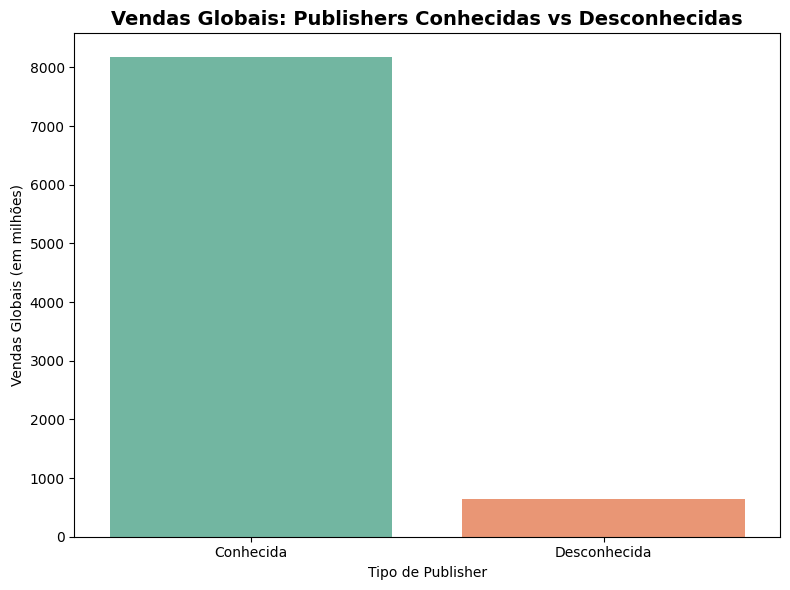

In [108]:

plt.figure(figsize=(8,6))
sns.barplot(data=vendas_por_tipo, x='Publisher_Type', y='Global_Sales', palette='Set2')

plt.title('Vendas Globais: Publishers Conhecidas vs Desconhecidas', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Publisher')
plt.ylabel('Vendas Globais (em milhões)')
plt.tight_layout()
plt.show()


# Conclusões Finais

- **Plataformas e Publishers mais relevantes:**  
  A análise revelou que plataformas como Wii, DS e PS2 lideram as vendas globais, com publishers como Nintendo, Electronic Arts e Sony Computer Entertainment dominando o mercado.

- **Ciclo de vida das plataformas:**  
  Plataformas como o PS2 e Xbox 360 tiveram um ciclo de vida longo, indicando grande longevidade e sucesso comercial.

- **Gênero mais vendido por plataforma:**  
  Cada plataforma tem um gênero predominante que impulsiona suas vendas, como Action para PS4 e Shooter para Xbox One, mostrando a importância de entender o público-alvo para cada console.

- **Impacto dos publishers conhecidos:**  
  Publishers com mais de 50 jogos lançados representam a esmagadora maioria das vendas globais, mostrando a importância de grandes estúdios consolidados para o mercado de games.

- **Relevância da marca:**  
  Nintendo continua sendo a publisher mais influente em diversas plataformas, refletindo sua força histórica e conexão com o público.

Essas conclusões ajudam a mapear o panorama do mercado de videogames, oferecendo insights importantes para análise de tendências e estratégias de desenvolvimento e marketing.

